In [1]:
%matplotlib inline
# IMPORTS UTILES
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

import matplotlib.pyplot as plt
print("matplotlib version:", matplotlib.__version__)

import mglearn
print("mglearn version:", mglearn.__version__)

from sklearn.datasets import make_blobs

Python version: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.4.2
matplotlib version: 3.5.1
NumPy version: 1.21.5
SciPy version: 1.7.3
IPython version: 8.2.0
scikit-learn version: 1.0.2
matplotlib version: 3.5.1
mglearn version: 0.1.9


# Apprentissage supervisé

## Objectif

L'objectif est de réaliser une **classification** à 2 classes. Dans le cas du cancer du sein, les 2 classes seront : **benin** ou **malin**

A titre d'illustration, voici 26 données ayant 2 descripteurs (représentable donc avec un graphique en 2 dimensions), qui sont classées ici en 2 classes. L'objectif sera de déterminer une frontière qui délimitera les deux classes. 


X.shape : (26, 2)
y.shape : (26,)


c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


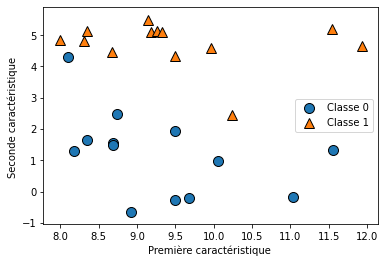

In [4]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Classe 0", "Classe 1"], loc=5)
plt.xlabel("Première caractéristique ")
plt.ylabel("Seconde caractéristique ")
print("X.shape : {}".format(X.shape))
print("y.shape : {}".format(y.shape))

## Jeu de données réelles.

- Déterminer si une tumeur est cancéreuse ou pas à partir de données cliniques : **problème de classification**
- Le jeu de données a été développé par des chercheurs de l'université du Wisconsin
- Il est constitué de 569 échantillons déjà étiquettés (212 malins et 357 bénins)
- Chaque échantillon est décrit par 30 attributs numériques

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() : {}".format(cancer.keys()))
print("Shape des données du cancer : {} ".format(cancer.data.shape))
print("Dénombrement des classes : \n{}".format({
n: v for n,v in zip(cancer.target_names,np.bincount(cancer.target))
}))

cancer.keys() : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape des données du cancer : (569, 30) 
Dénombrement des classes : 
{'malignant': 212, 'benign': 357}


In [6]:
# Affichage des caractéristiques
print("Caractéristiques : \n{}".format(cancer.feature_names))

Caractéristiques : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Méthode des k-plus proches voisins.

Principe des k-plus proches voisins illustrés ci-dessous (exemple avec k=3)

c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


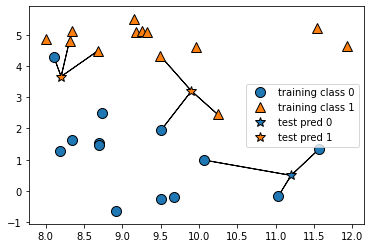

In [29]:
from sklearn.datasets import make_blobs

mglearn.plots.plot_knn_classification(n_neighbors=3)

Etiquettes prédites : [1 0 1 0 1 0 0] / Etiquettes réelles : [1 0 1 0 1 1 0]
Pourcentage de réussite : 0.86


c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


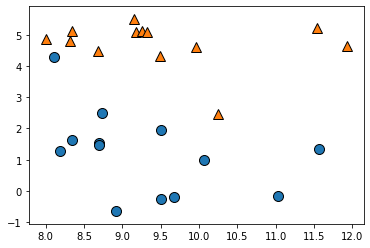

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pylab as pl

X,y = mglearn.datasets.make_forge()
X_train , X_test, y_train, y_test = train_test_split(X,y, random_state=0)

mglearn.discrete_scatter(X[:,0],X[:,1],y)
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)

print("Etiquettes prédites : {} / Etiquettes réelles : {}".format(
    clf.predict(X_test), y_test)
     )

print("Pourcentage de réussite : {:.2f}".format( clf.score(X_test,y_test) ) )

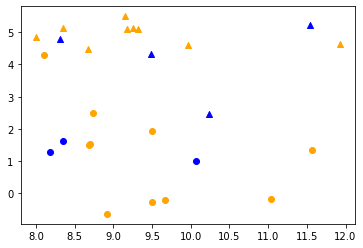

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

for i in range(len(X_train[:,0])):
    plt.scatter(X_train[i,0],X_train[i,1], marker='o' if y_train[i] == 0 else '^', color = 'orange' )

for i in range(len(X_test[:,0])):
    plt.scatter(X_test[i,0],X_test[i,1], marker='o' if y_test[i] == 0 else '^', color = 'blue' )
    
plt.show()

## Affichage de la "frontière" générée par l'algorithme des k-plus proches voisins (en fonction de k)

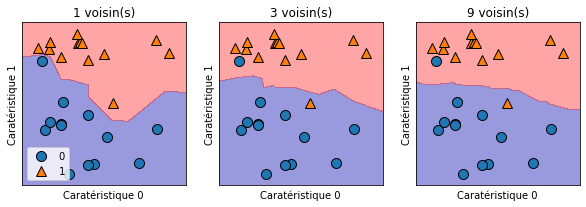

In [32]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True, eps=0.5, ax=ax, alpha =0.4 )
    mglearn.discrete_scatter(X[:,0], X[:,1] , y, ax = ax)
    ax.set_title("{} voisin(s)".format(n_neighbors))
    ax.set_xlabel("Caratéristique 0")
    ax.set_ylabel("Caratéristique 1")
axes[0].legend(loc = 3)
plt.show()

## Evolution de la précision des "prédictions" en fonction du choix de la valeur de k

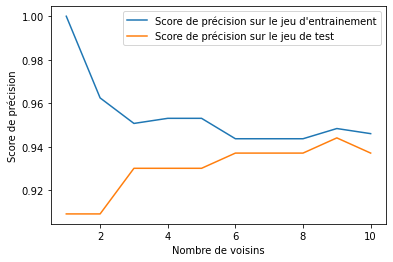

In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train , X_test, y_train, y_test = train_test_split( cancer.data , cancer.target , stratify = cancer.target,
                                                     # random_state=66
                                                    )

training_accuracy = []
test_accuracy = []
neighbors_setting = range(1,11)

for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier( n_neighbors= n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_setting, training_accuracy, label = "Score de précision sur le jeu d'entrainement")
plt.plot(neighbors_setting, test_accuracy, label = "Score de précision sur le jeu de test")
plt.ylabel("Score de précision")
plt.xlabel("Nombre de voisins")
plt.legend()

plt.show()

## Modèles linéaires pour la classification

Sépararation de l'espace par une droite, ou un plan, ou un hyperplan. Cela permet d'obtenir deux classes.

c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


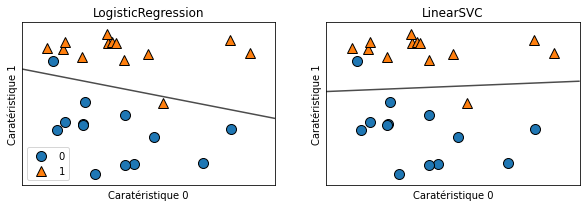

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10,3))

for model, ax in zip([LogisticRegression(max_iter=10000), LinearSVC(max_iter=10000)], axes):
    model_trained = model.fit(X,y)
    mglearn.plots.plot_2d_separator(model_trained, X , fill = False, eps = 0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title(str(model_trained.__class__.__name__))
    ax.set_xlabel('Caratéristique 0')
    ax.set_ylabel('Caratéristique 1')
axes[0].legend()    


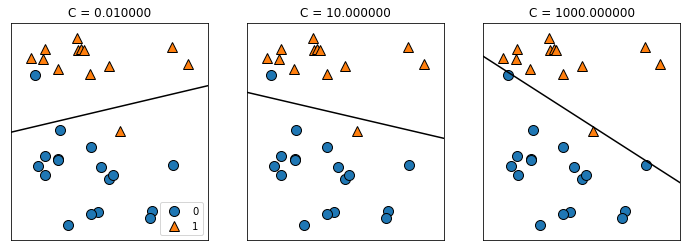

In [17]:
# Paramètre d'équilibre : C
# C petit : ajuster la majorité des points
# C grand : chaque point bien classifié => risque de surapprentissage

mglearn.plots.plot_linear_svc_regularization()

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,                                                 
                                                 random_state=42)
logreg = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
print("Score sur les données d'entrainement : {}".format(logreg.score(X_train,y_train)))
print("Score sur les données de test : {}".format(logreg.score(X_test,y_test)))


Score sur les données d'entrainement : 0.9624413145539906
Score sur les données de test : 0.965034965034965


In [22]:
# Avec une valeur de C plus elevée 

logreg100 = LogisticRegression(C=100,max_iter = 10000).fit(X_train, y_train)
print("Score sur les données d'entrainement : {}".format(logreg100.score(X_train,y_train)))
print("Score sur les données de test : {}".format(logreg100.score(X_test,y_test)))


Score sur les données d'entrainement : 0.9788732394366197
Score sur les données de test : 0.965034965034965


In [23]:
# Avec une valeur de C moins élevée ()

logreg001 = LogisticRegression(C=0.001,max_iter = 10000).fit(X_train, y_train)
print("Score sur les données d'entrainement : {}".format(logreg001.score(X_train,y_train)))
print("Score sur les données de test : {}".format(logreg001.score(X_test,y_test)))

Score sur les données d'entrainement : 0.9366197183098591
Score sur les données de test : 0.9790209790209791


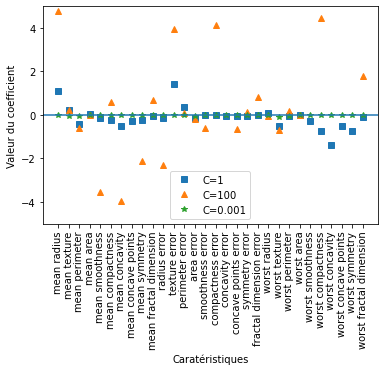

In [24]:
# Affichage des coefficients de pondération pour chaque "feature"
# Méfiance : l'interprétation des coefficients doit être réalisée avec prudence, ceux-ci varient beaucoup en fonction de C
plt.plot(logreg.coef_.T, 's', label = "C=1")
plt.plot(logreg100.coef_.T, '^', label = "C=100")
plt.plot(logreg001.coef_.T, '*', label = "C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)

plt.legend(loc = "lower center")
plt.xlabel("Caratéristiques")
plt.ylabel("Valeur du coefficient")
plt.show()

In [35]:
# On peut utiliser la régularisation L1

# Attention penalty = 'l1' ne marche pas !

# for C, marker in zip([0.001, 1, 100], ['o', '^', '*']):
#     lr_l1 = LogisticRegression(C=C, penalty = 'l1').fit(X_train, y_train)
#     print("Score sur les données d'entrainement : {}".format(lr_l1.score(X_train,y_train)))
#     print("Score sur les données de test : {}".format(lr_l1.score(X_test,y_test)))

## Modèles linéaires de classification multiclasse

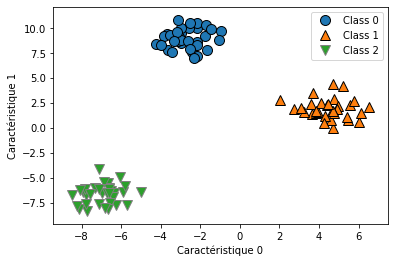

In [25]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Caractéristique 0")
plt.ylabel("Caractéristique 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [26]:
linear_svm = LinearSVC().fit(X,y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


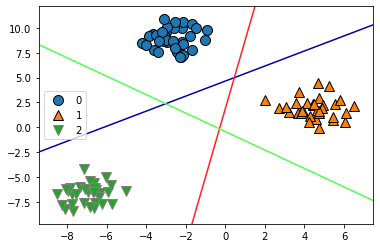

In [27]:
# Classification sur le modèle Un contre Tous (OvA)
# Les droites de séparation sont produites, par exemple, en prenant la frontière correspondante aux points de la classe 0 contre tous les autres points

mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept ) / coef[1] , c = color)
plt.legend()
plt.show()

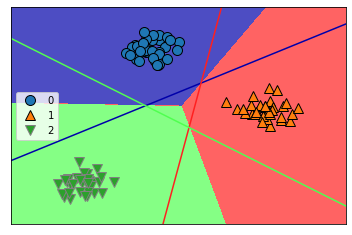

In [28]:
# Une frontière de décision multiclasse est tracée en déterminant la ligne la plus proche du point considéré

mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha=0.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept ) / coef[1] , c = color)
plt.legend()
plt.show()